In [1]:
from pandas import read_csv
import pandas as pd
train=read_csv('../HousePrices/train.csv', header=0, index_col=0)
val=read_csv('../HousePrices/val.csv', header=0, index_col=0)

In [2]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 objective ='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [4]:
every_column_except_y= [col for col in train.columns if col not in ['SalePrice','Id']]
model.fit(train[every_column_except_y],train['SalePrice'])
#y_train = train['SalePrice']
#X_train = train.drop('SalePrice', axis = 1)
#model.fit(X_train,y_train)

/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1,
       seed=42, silent=None, subsample=0.6, verbosity=1)

In [4]:
every_valcolumn_except_y= [col for col in val.columns if col not in ['SalePrice','Id']]
y_val_predict = model.predict(val[every_valcolumn_except_y])
#X_val = val.drop('SalePrice', axis = 1)
#y_val_predict = model.predict(X_val)
print(y_val_predict)

[138510.97  322943.78  104980.9   154010.55  327386.62   78617.766
 230258.03  143790.14   64912.58  139343.16  144941.02  113069.984
 124040.1   204716.27  173198.78  123409.6   190282.98  123046.77
 115403.71  214224.05  149545.67  226542.05  170466.03  135748.17
 205009.77  162450.12  195152.9   107131.83  174824.38  193461.62
 124127.7   273820.34  216165.95  121213.805 264521.47  148540.7
 132405.72  197808.86  323115.8   110914.09  125558.24  246055.3
 122801.42  387869.1   119624.09  132689.28  112313.25  124592.12
 437961.    133585.73  122925.68  202706.73  105420.35  329733.4
 140562.56  240099.9   196856.61  158629.53  130993.766  88668.01
  73189.18  170786.64  313310.53  302875.2   300622.8   212211.66
 114013.555 328490.94  104905.31  167376.06  119882.195 126284.94
 116384.3    79402.17  408169.62  183145.17  310197.78  319862.78
 145211.19  116461.586 113753.195  69878.22  118405.1    90557.1
 159082.1   142776.3   258813.94  193387.89  131431.86  171241.42
 135798.17  

In [5]:
from sklearn.metrics import mean_absolute_error
y_val = val['SalePrice']
mean_absolute_error(y_val, y_val_predict)

15973.452282213186

In [6]:
from collections import OrderedDict
feat_imp = OrderedDict(sorted(model.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))
feat_imp

OrderedDict([('LotArea', 4389),
             ('BsmtUnfSF', 3447),
             ('GrLivArea', 3370),
             ('1stFlrSF', 3023),
             ('GarageArea', 2696),
             ('BsmtFinSF1', 2601),
             ('TotalBsmtSF', 2514),
             ('YearBuilt', 2408),
             ('LotFrontage', 2243),
             ('GarageYrBlt', 1950),
             ('YearRemodAdd', 1857),
             ('OpenPorchSF', 1839),
             ('TotRmsAbvGrd', 1775),
             ('MasVnrArea', 1730),
             ('WoodDeckSF', 1470),
             ('MoSold', 1469),
             ('2ndFlrSF', 1295),
             ('MSSubClass', 904),
             ('OverallQual', 885),
             ('YrSold', 860),
             ('Functional_Maj1', 847),
             ('BldgType_Twnhs', 635),
             ('Neighborhood_CollgCr', 607),
             ('BedroomAbvGr', 591),
             ('OverallCond', 520),
             ('EnclosedPorch', 379),
             ('BsmtExposure_Gd', 347),
             ('Fireplaces', 335),
          

In [7]:
#Let's remove the less important ones 
most_relevant_features= list(dict((k, v) for k, v in model.get_booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['ExterQual_TA', 'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'CentralAir_Y', 'YearBuilt', 'Fireplaces', 'GarageArea', 'RoofStyle_Hip', 'BsmtQual_Ex', 'ExterQual_Ex', 'CentralAir_N', 'GrLivArea', '1stFlrSF', 'GarageYrBlt', 'KitchenQual_TA', 'OverallQual', 'BsmtFullBath', 'Neighborhood_Edwards', 'LotArea', 'LotFrontage', 'GarageType_Attchd', 'GarageType_Detchd', 'PavedDrive_N', 'TotRmsAbvGrd', 'Exterior2nd_CmentBd', 'FullBath', 'MSSubClass', 'BsmtQual_TA', 'Foundation_PConc', 'FireplaceQu_None', 'YearRemodAdd', 'MoSold', 'Neighborhood_OldTown', 'LandSlope_Gtl', 'Exterior1st_Stucco', 'LandContour_Bnk', 'MSZoning_RM', 'OverallCond', 'KitchenQual_Ex', 'BsmtFinType1_GLQ', 'Fence_MnPrv', 'WoodDeckSF', 'ScreenPorch', 'BsmtExposure_Gd', 'Condition1_Feedr', 'SaleType_New', 'OpenPorchSF', 'SaleCondition_Partial', 'MasVnrArea', 'ExterQual_Gd', 'Functional_Typ', 'Exterior2nd_BrkFace', 'BsmtUnfSF', 'GarageCond_TA', 'BsmtCond_Fa', 'BedroomAbvGr', 'Neighborhood_Crawfor', 'Exterior1st_BrkFac

<IPython.core.display.Javascript object>


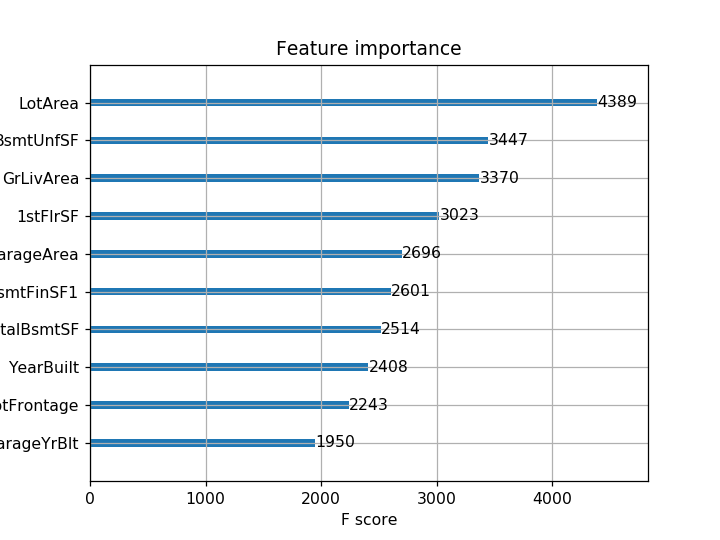

In [28]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
%matplotlib notebook
plot_importance(model, max_num_features=10) # top 10 most important features
plt.show()

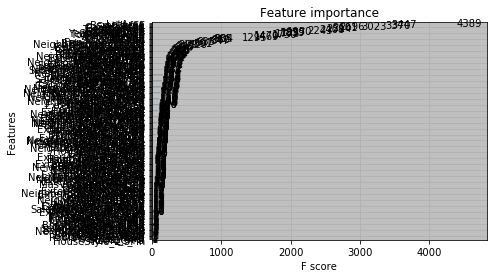

In [9]:
plot_importance(model)
plt.draw()

In [68]:
from sklearn.model_selection import GridSearchCV 
train_x=train[most_relevant_features]
train_y=train['SalePrice']
#for tuning parameters
parameters_for_testing = {
     'learning_rate':[0.1,0.07],
     'max_depth':[3,5],
     'n_estimators':[10000],
     'reg_alpha':[1e-5, 1e-2,  0.75],
     'reg_lambda':[1e-5, 1e-2, 0.45],
     'subsample':[0.6,0.95],
}

                    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.cv_results_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:  7.8min remaining: 15.5min
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:  8.0min remaining:  8.0min
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:  8.1min remaining:  4.0min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed: 10.1min remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed: 10.1min finished


[14:38:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'mean_fit_time': array([465.1188391 , 396.03745135]), 'std_fit_time': array([18.94835179, 89.71712295]), 'mean_score_time': array([1.81601254, 1.2819949 ]), 'std_score_time': array([0.78639577, 0.51260513]), 'param_learning_rate': masked_array(data=[0.1, 0.07],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10000, 10000],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.1, 'n_estimators': 10000}, {'learning_rate': 0.07, 'n_estimators': 10000}], 'split0_test_score': array([-9.40789163e+08, -1.01736566e+09]), 'split1_test_score': array([-8.89692572e+08, -8.32739433e+08]), 'split2_test_score': array([-5.01384596e+08, -4.83619175e+08]), 'mean_test_score': array([-7

<IPython.core.display.Javascript object>


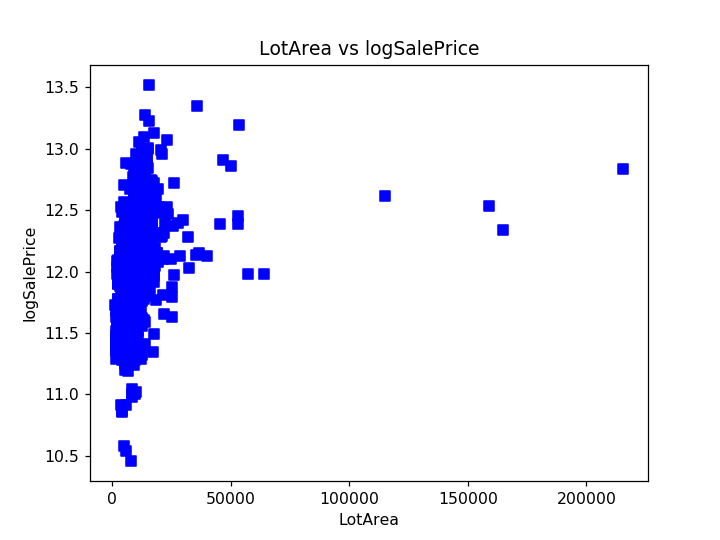

<IPython.core.display.Javascript object>


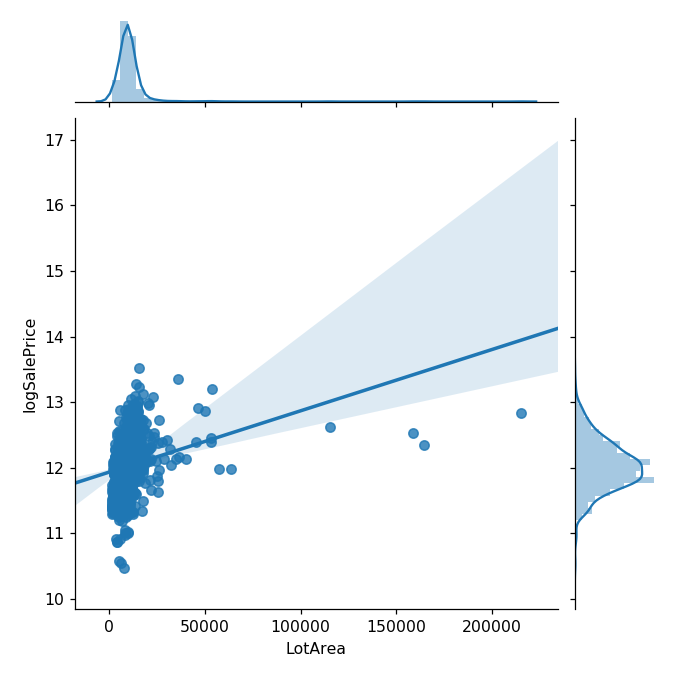

/opt/conda/envs/tf2/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [56]:
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
graphe = sns.jointplot('LotArea', 'logSalePrice', data=train, kind="reg")

<IPython.core.display.Javascript object>


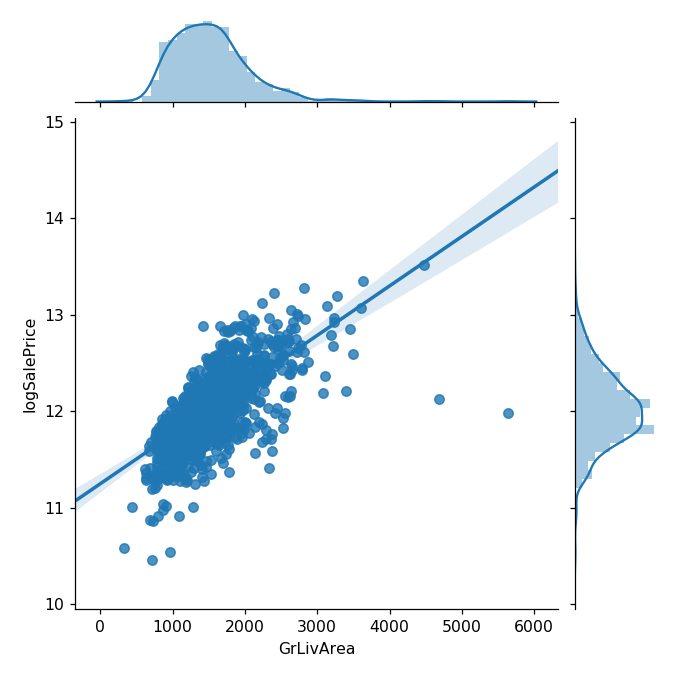

In [53]:
train['logSalePrice'] = np.log(train['SalePrice'])
graphe1 = sns.jointplot('GrLivArea', 'logSalePrice', data=train, kind="reg")

In [45]:
#removing outliers
train_outliers = train[train.GrLivArea < 4000]

<IPython.core.display.Javascript object>


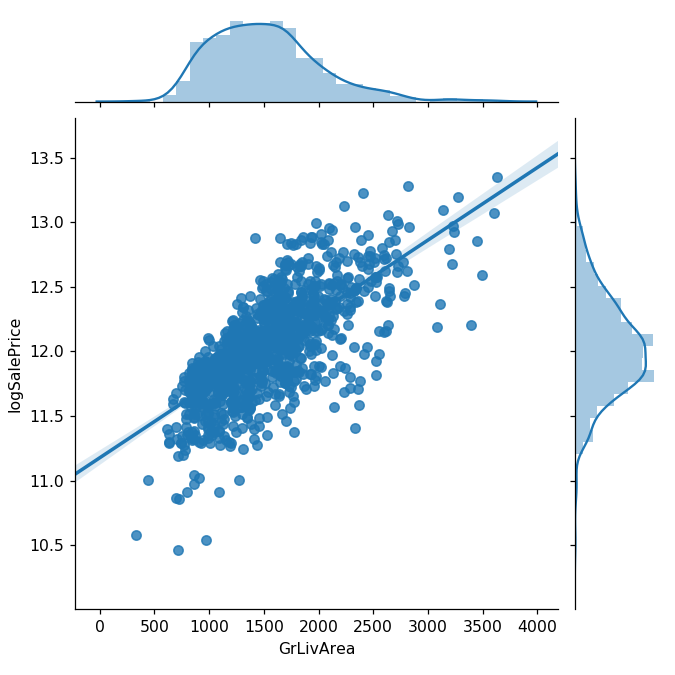

In [51]:
graphe2 = sns.jointplot('GrLivArea', 'logSalePrice', data=train_outliers, kind="reg")

In [15]:
X_train=train[most_relevant_features]
y_train=train['SalePrice']

In [16]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 objective ='reg:squarederror',
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [17]:
best_xgb_model.fit(train[most_relevant_features],train['SalePrice'])

/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/envs/tf2/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0,
       importance_type='gain', learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1,
       seed=42, silent=None, subsample=0.6, verbosity=1)

In [18]:
y_val_predict = best_xgb_model.predict(val[most_relevant_features])
y_val = val['SalePrice']
mean_absolute_error(y_val, y_val_predict)

15733.070111836472

In [19]:
test = read_csv('../HousePrices/test.csv', header=0)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [20]:
test_object = test.select_dtypes(include='object')
test_object = test_object.fillna('None')

In [21]:
test_object = pd.get_dummies(test_object)
test_object = test_object.astype(int)
test_object = test_object.drop(['MSZoning_RL'], axis=1)

In [22]:
test_number = test.select_dtypes(exclude='object')
test_number = test_number.fillna(0)

In [23]:
import pandas as pd
test = pd.concat([test_number, test_object], axis=1)
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
test['Prediction'] = best_xgb_model.predict(test[most_relevant_features])

In [25]:
filename = 'prediction_XGBOOST.csv'
pd.DataFrame({'Id': test.Id, 'SalePrice': test.Prediction}).to_csv(filename, index=False)

In [26]:
print(test['Prediction'].head())
print(test['Prediction'].count())

0    136640.500000
1    166447.703125
2    192293.296875
3    191618.484375
4    195207.968750
Name: Prediction, dtype: float32
1459


In [27]:
test.to_csv("test_modified.csv")

# Score Kaggle
<center> Sans Standardiser les données </center>
Best_Xgb_Model : 0.13504  
<center> Avec Standardisation </center>